# CNN(Convolutional Neural Network)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import convolve, convolve2d, correlate, correlate2d
from sklearn.datasets import load_sample_image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras

# 1차원 합성곱 연산(1-D Convolution)

In [2]:
x = np.arange(1, 5)
print(x)

[1 2 3 4]


In [3]:
y = np.array([1, 2])
print(y)

[1 2]


In [4]:
y_flip = np.flip(y)
print(y_flip)

[2 1]


## convolve 함수

scipy.signal.convove 함수는 배열 y를 flip(반전)시킨 후 연산을 수행.

In [5]:
result = convolve(x, y, mode='valid')  # valid mode 합성곱 연산 -> 배열 x의 크기가 줄어듦.
print(result)

[ 4  7 10]


In [6]:
result = convolve(x, y, mode='same')  # same mode 합성곱 연산 -> x의 크기와 동일한 배열 리턴.
print(result)

[ 1  4  7 10]


In [7]:
result = convolve(x, y, mode='full')  # full mode 합성곱 연산
# -> 배열 x의 모든 원소가 합성곱 연산에 같은 비율로 참여하도록 패딩을 넣는 것.
print(result)

[ 1  4  7 10  8]


## 교차 상관(cross-correlate)

scipy.signal.correlate 함수는 배열 y를 반전시키지 않고 연산을 수행.

In [8]:
result = correlate(x, y, mode='valid')
print(result)

[ 5  8 11]


In [9]:
result = correlate(x, y, mode='same')
print(result)

[ 2  5  8 11]


In [10]:
result = correlate(x, y, mode='full')
print(result)

[ 2  5  8 11  4]


# 2차원 합성곱(2-D Convolution)

In [11]:
x = np.arange(1, 17).reshape((4, 4))
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [12]:
y = np.array([[0, 1], [2, 0]])
print(y)

[[0 1]
 [2 0]]


In [13]:
y_flip = np.flip(y)
print(y_flip)

[[0 2]
 [1 0]]


## convolve2d 함수

In [14]:
result = convolve2d(x, y, mode='valid')
print(result)  #> (3, 3) shape

[[ 9 12 15]
 [21 24 27]
 [33 36 39]]


In [15]:
result = convolve2d(x, y, mode='same')
print(result)  #> (4, 4) shape

[[ 0  1  2  3]
 [ 2  9 12 15]
 [10 21 24 27]
 [18 33 36 39]]


In [16]:
 result = convolve2d(x, y, mode='full')
 print(result)  #> (5, 5) shape

[[ 0  1  2  3  4]
 [ 2  9 12 15  8]
 [10 21 24 27 12]
 [18 33 36 39 16]
 [26 28 30 32  0]]


## correlate2d 함수

In [17]:
result = correlate2d(x, y, mode='valid')
print(result)

[[12 15 18]
 [24 27 30]
 [36 39 42]]


In [18]:
result = correlate2d(x, y, mode='same')
print(result)

[[12 15 18 16]
 [24 27 30 24]
 [36 39 42 32]
 [14 15 16  0]]


In [19]:
result = correlate2d(x, y, mode='full')
print(result)

[[ 0  2  4  6  8]
 [ 1 12 15 18 16]
 [ 5 24 27 30 24]
 [ 9 36 39 42 32]
 [13 14 15 16  0]]


# 이미지 배열과 합성곱

In [20]:
china = load_sample_image('china.jpg')

In [21]:
china.shape

(427, 640, 3)

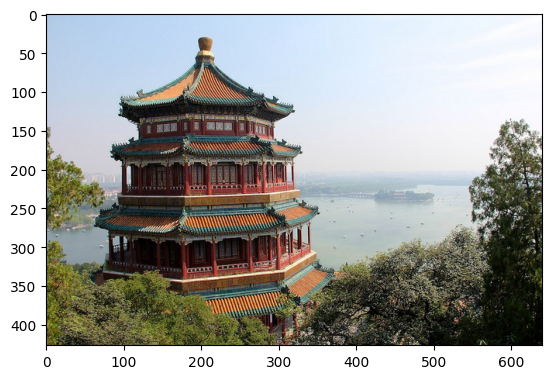

In [22]:
plt.imshow(china)
plt.show()

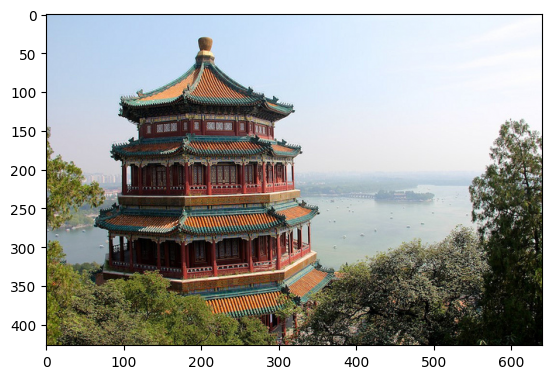

In [23]:
china_cp = china.copy() / 255.0  # 0 ~ 255 범위를 0 ~ 1 범위로 스케일링
plt.imshow(china_cp)
plt.show()

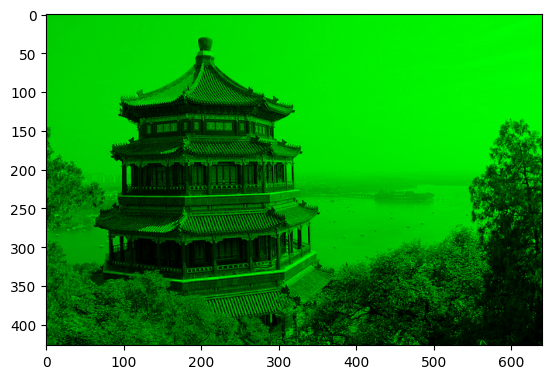

In [24]:
china_cp[:, :, [0, 2]] = 0
plt.imshow(china_cp)
plt.show()

In [25]:
filter = np.zeros(shape=(3, 3, 3))
filter[:, :, 0] = 1
result = convolve(china, filter, mode='same')
result = result.astype(np.uint8)  # np.uint8: unsigined int 8bit. 8 bit 부호 없는 정수. 0 ~ 255.
print(result.shape)

(427, 640, 3)


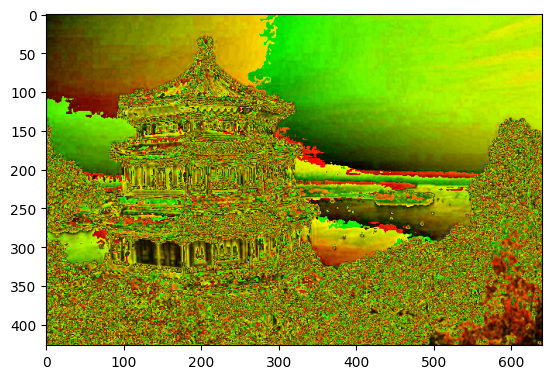

In [26]:
plt.imshow(result)
plt.show()

# Pooling

In [27]:
x = np.arange(1, 21).reshape((5, 4))
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]


In [28]:
x = x.reshape((1, 5, 4, 1))

## Max Pooling(최대 풀링)

필터링된 값들 중에서 최댓값을 선택하는 풀링 방식.

In [29]:
max_pooling = keras.layers.MaxPool2D()
x_pool = max_pooling(x)
print(x_pool.shape)
print(type(x_pool))

(1, 2, 2, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [30]:
print(x_pool.numpy().reshape((2, 2)))  # Tensor -> numpy 배열 변환 -> reshape

[[ 6  8]
 [14 16]]


## Average Pooling(평균 풀링)

필터링된 값들의 평균을 선택하는 풀링 방식.

In [31]:
x = x.astype(np.float32)  # TensorFlow는 암묵적인 타입 변환을 수행하지 않기 때문에.
avg_pooling = keras.layers.AveragePooling2D(pool_size=(2, 2))
x_pool = avg_pooling(x)
print(type(x_pool))
print(x_pool.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(1, 2, 2, 1)


In [32]:
x_pool = x_pool.numpy().reshape((2, 2))
print(x_pool)

[[ 3.5  5.5]
 [11.5 13.5]]


In [33]:
(1 + 2 + 5 + 6) / 4

3.5

일반적으로 합성곱 연산에서는 필터를 1칸씩 이동(보폭 stride의 크기를 1로 설정).
풀링에서는 필터를 필터의 크기만큼씩 이동.

## 이미지의 풀링(pooling)

이미지 축소

In [34]:
flower = load_sample_image('flower.jpg').copy()

In [35]:
flower.shape  # (height, width, channel)

(427, 640, 3)

In [36]:
flower = flower / 255.0  # 0 ~ 1 범위로 스케일링

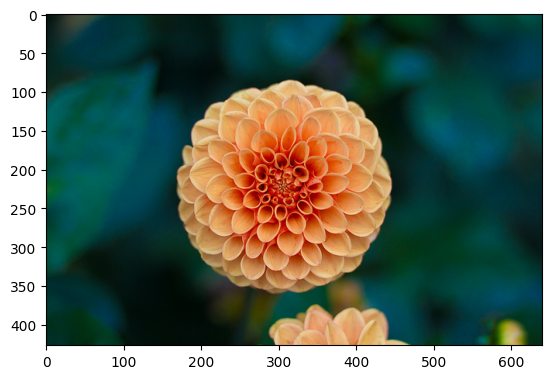

In [37]:
plt.imshow(flower)
plt.show()

In [38]:
max_pooling = keras.layers.MaxPool2D()

In [39]:
x = flower.reshape((1, 427, 640, 3))
x_pool = max_pooling(x)
print(x_pool.shape)
print(type(x_pool))

(1, 213, 320, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


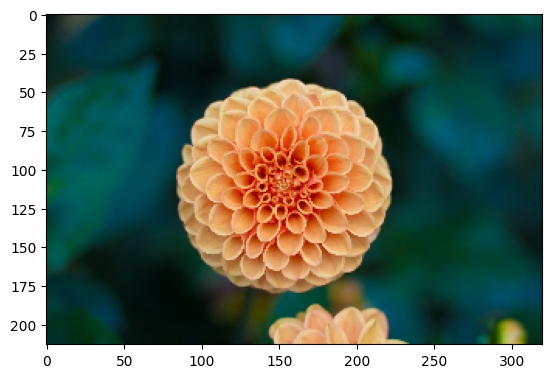

In [40]:
img = x_pool[0].numpy()
plt.imshow(img)
plt.show()

In [41]:
avg_pooling = keras.layers.AvgPool2D(pool_size=(2, 2))

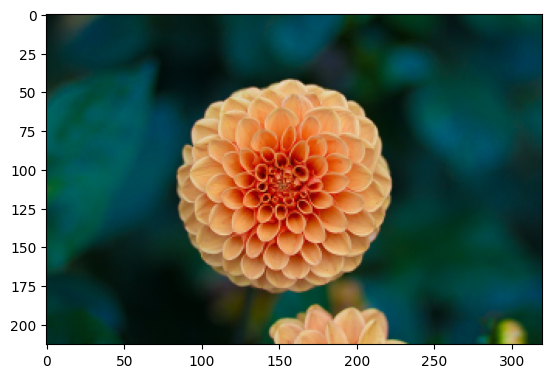

In [42]:
x_pool = avg_pooling(x)
img = x_pool[0].numpy()
plt.imshow(img)
plt.show()

# Python에서의 이미지

*   숫자들의 배열.
*   숫자들의 스케일:
    *   0 ~ 255 정수 스케일(부호가 없는 1바이트(8비트) 정수, np.uint8)
    *   0.0 ~ 1.0 실수 스케일
*   배열의 모양
    *   흑백 이미지: (height, width) shape의 2차원 배열.
    *   컬러 이미지: (height, width, channel) shape의 3차원 배열.
        *   불투명한 이미지인 경우, (height, width, 3). channel=rgb
        *   투명한 이미지인 경우, (height, width, 4). channel=rgba
    *   Keras 패키지에서는 합성곱 층에서 흑백 이미지를 사용할 때, 컬러 이미지처럼 3차원 배열을 사용.
        *   흑백 이미지를 (height, width, 1) shape의 3차원 배열로 취급.

# CNN(Convolutional Neural Network, 합성곱 신경망)

Input --> Conv2D --> MaxPooling2D --> Conv2D --> MaxPooling2D --> Flatten --> Dense --> Dropout --> Dense(Output)

## Fashion MNIST datasets

In [43]:
(x_train_full, y_train_full), (x_test, y_test) = \
       keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [44]:
print(x_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [45]:
# 훈련 셋을 (60_000, 28, 28) 모양에서 (60_000, 28, 28, 1) 모양으로 변환하고,
# 0 ~ 1 사이의 범위 숫자로 스케일링.
x_train_full_scaled = x_train_full.reshape((-1, 28, 28, 1)) / 255.0
x_test_scaled = x_test.reshape((-1, 28, 28, 1)) / 255.0

In [46]:
# 전체 훈련 셋과 훈련 레이블을 훈련 셋과 검증 셋으로 나눔.
x_train, x_val, y_train, y_val = \
        train_test_split(x_train_full_scaled, y_train_full,
                         test_size=0.2, stratify=y_train_full,
                         random_state=42)

In [47]:
print(x_train.shape)
print(x_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


## 합성곱 신경망 생성

*   filter(필터): 합성곱 층에서의 unit(neuron).
*   kernel(커널): filter. 합성곱 연산에서 곱해지는 가중치(filter의 값들).
*   feature map(특성 맵): 합성곱 연산의 결과로 나오는 출력.
*   padding(패딩): 입력 배열 주위에 가상의 값(0)을 채우는 것.
    *   same padding: 입력과 특성 맵의 크기를 같게 만들어 주는 패딩 방식.
    *   valid padding: 패딩 없이 합성곱을 수행. 특성 맵의 크기는 입력 배열의 크기보다 작아짐.
*   stride(보폭): filter를 이동시키는 보폭. 합성곱 연산에서는 일반적으로 stride=1.
    *   합성곱 층의 stride를 크게해서 이미지 사이즈를 줄이는 방법보다는, 풀링 층을 사용해서 이미지의 크기를 줄이는 방법을 선호.
*   pooling(풀링):
    *   가중치(kernel 값)가 없고, 일반적으로 풀링의 크기와 보폭의 크기를 같게 함.
    *   일반적으로 패딩을 사용하지 않음. padding='valid'.
    *   max pooling(최대 풀링): filter 안의 입력값들 중 최댓값을 선택.
    *   average pooling(평균 풀링): filter 안의 입력값들의 평균을 계산.
    *   평균 풀링은 특성 맵의 중요한 정보들을 희석시킬 수 있기 때문에, 최대 풀링을 더 선호.

In [48]:
# Sequential 객체 생성
model = keras.Sequential()

In [49]:
# 입력 층(input layer) - (height, width, n_channels)
inputs = keras.Input(shape=(28, 28, 1))
model.add(inputs)

In [50]:
# 합성곱 층(convolutional layer)
conv_1 = keras.layers.Conv2D(filters=32, kernel_size=3,
                             padding='same', activation='relu')
model.add(conv_1)

In [51]:
# 최대 풀링 층(max pooling layer)
max_pool_1 = keras.layers.MaxPool2D()
model.add(max_pool_1)

In [52]:
conv_2 = keras.layers.Conv2D(filters=64, kernel_size=3,
                             padding='same', activation='relu')
model.add(conv_2)

In [53]:
max_pool_2 = keras.layers.MaxPool2D()
model.add(max_pool_2)

In [54]:
# flatten layer: 입력 배열(특성 맵)을 2차원 배열로 변환.
model.add(keras.layers.Flatten())

In [55]:
# 밀집 층(dense layer)
dense_1 = keras.layers.Dense(units=100, activation='relu')
model.add(dense_1)

In [56]:
# drop-out layer(과대적합을 줄이기 위해서)
model.add(keras.layers.Dropout(rate=0.3))

In [57]:
# 출력 층(output layer)
dense_2 = keras.layers.Dense(units=10, activation='softmax')
model.add(dense_2)

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

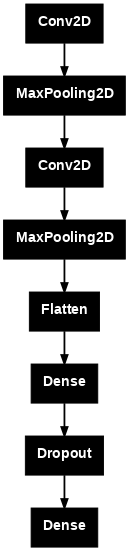

In [59]:
keras.utils.plot_model(model, dpi=64)

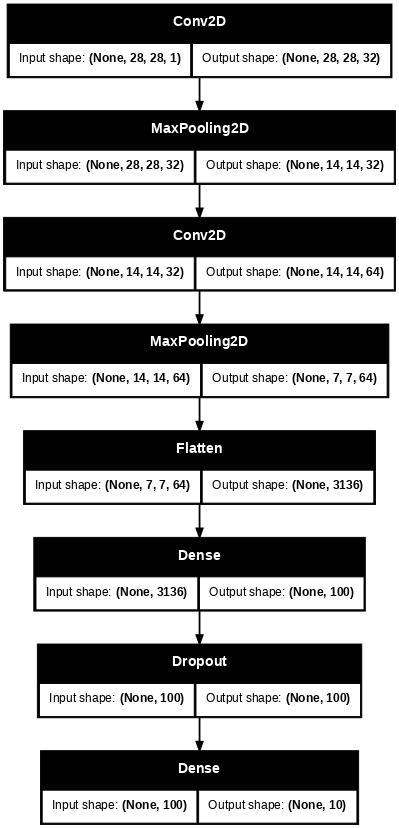

In [60]:
keras.utils.plot_model(model, dpi=64, show_shapes=True)

## 모델 컴파일

In [61]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy])

## 모델 훈련

In [62]:
# 모델 파일 저장 위치
dir_path = '/content/drive/MyDrive/Colab Notebooks/lab_da/'
model_file = dir_path + 'cnn_best_model.keras'

# 콜백 생성
checkpoint = keras.callbacks.ModelCheckpoint(model_file, save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [63]:
# 모델 훈련
result = model.fit(x=x_train, y=y_train, epochs=100,
                   callbacks=[checkpoint, early_stop],
                   validation_data=[x_val, y_val])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - loss: 0.7020 - sparse_categorical_accuracy: 0.7435 - val_loss: 0.3281 - val_sparse_categorical_accuracy: 0.8782
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - loss: 0.3487 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.2713 - val_sparse_categorical_accuracy: 0.9024
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 132s 49ms/step - loss: 0.2903 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.2527 - val_sparse_categorical_accuracy: 0.9071
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - loss: 0.2513 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.2313 - val_sparse_categorical_accuracy: 0.9164
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - loss: 0.2252 - sparse_categorical_accuracy: 0.9154 - val_loss: 0.2271 - val_sparse_categorical_accuracy: 0.9187
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - loss: 0.2055 - sparse_categorical_accuracy: 0.9246 - val_loss: 0.2279 - val_sparse_ca

In [64]:
type(result)

keras.src.callbacks.history.History

In [65]:
result.epoch  #> list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [66]:
result.history  #> dict

{'loss': [0.5079047679901123,
  0.3358002305030823,
  0.2850266396999359,
  0.25187569856643677,
  0.2247394472360611,
  0.20421621203422546,
  0.18996661901474,
  0.1733679622411728,
  0.15896986424922943,
  0.14439840614795685,
  0.1363833248615265],
 'sparse_categorical_accuracy': [0.8159791827201843,
  0.8785833120346069,
  0.8963541388511658,
  0.9074375033378601,
  0.9156875014305115,
  0.9237708449363708,
  0.9284374713897705,
  0.9351875185966492,
  0.9394999742507935,
  0.9455416798591614,
  0.9483333230018616],
 'val_loss': [0.3280960023403168,
  0.27127012610435486,
  0.2527001202106476,
  0.231253981590271,
  0.22709910571575165,
  0.22792121767997742,
  0.22012946009635925,
  0.2116597294807434,
  0.22744333744049072,
  0.21800069510936737,
  0.2373429536819458],
 'val_sparse_categorical_accuracy': [0.878166675567627,
  0.9024166464805603,
  0.9070833325386047,
  0.9164166450500488,
  0.918749988079071,
  0.9178333282470703,
  0.921999990940094,
  0.9259166717529297,
  0.9

History 객체를 사용해서 (훈련/검증) 손실 그래프를 그리세요.

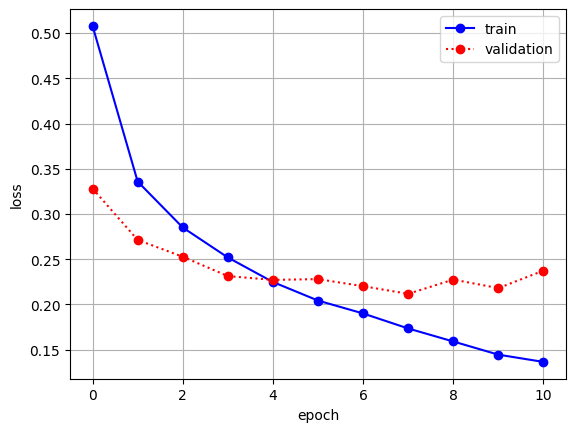

In [67]:
epochs = result.epoch
history = result.history
plt.plot(epochs, history['loss'], 'bo-', label='train')
plt.plot(epochs, history['val_loss'], 'ro:', label='validation')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 모델 평가

In [68]:
model.evaluate(x=x_train, y=y_train)  # 훈련 셋 손실/정확도

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.1204 - sparse_categorical_accuracy: 0.9572


[0.12209870666265488, 0.9555208086967468]

In [69]:
model.evaluate(x=x_val, y=y_val)  # 검증 셋 손실/정확도

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2111 - sparse_categorical_accuracy: 0.9280


[0.2116597294807434, 0.9259166717529297]

## 예측

In [70]:
predicts = model.predict(x=x_train[:5])
print(predicts)  #> 10개 클래스가 될 확률들.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[1.2356305e-02 1.6041931e-05 3.3111759e-02 1.5936986e-02 1.4960934e-02
  1.6379015e-07 9.2268485e-01 5.9089444e-09 9.3234080e-04 6.6325333e-07]
 [9.5214641e-01 1.8713690e-08 4.2247755e-04 1.6114174e-04 1.7453810e-04
  3.1288507e-09 4.7081068e-02 2.0169134e-11 1.4330977e-05 8.1708524e-09]
 [1.4062952e-06 1.0112976e-10 7.2480286e-11 9.9999738e-01 1.8179684e-09
  2.9322557e-16 1.1721138e-06 4.9348664e-16 7.7460191e-12 1.7874565e-13]
 [4.7385704e-05 6.4014387e-08 6.4773755e-09 9.9992323e-01 1.6949600e-09
  2.2969311e-13 2.9283885e-05 1.8367223e-14 1.0817929e-09 2.5866134e-11]
 [9.9999130e-01 5.1812897e-20 3.6333980e-10 1.6248818e-10 9.0997808e-16
  7.0427043e-20 8.6707614e-06 4.3433554e-20 6.6161296e-14 1.9764048e-18]]


In [71]:
predicts.argmax(axis=1)  #> 10개의 확률들 중에서 최댓값의 인덱스

array([6, 0, 3, 3, 0])

In [72]:
y_train[:5]  #> 실제 레이블

array([6, 6, 3, 3, 0], dtype=uint8)

훈련 셋의 confusion matrix, 검증 셋의 confusion matrix

In [73]:
train_predicts = model.predict(x=x_train)  # 훈련 셋에서의 예측 확률들
train_pred_labels = train_predicts.argmax(axis=1)  # 훈련 셋에서의 예측값들

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step


In [74]:
conf_mat = confusion_matrix(y_true=y_train, y_pred=train_pred_labels)
print(conf_mat)

[[4525    0   26   59    1    0  188    0    1    0]
 [   0 4770    0   26    1    0    3    0    0    0]
 [  63    0 4355   30  212    0  140    0    0    0]
 [  24    0    3 4708   44    0   21    0    0    0]
 [   2    0  109   71 4484    0  132    0    2    0]
 [   0    0    0    0    0 4794    1    3    0    2]
 [ 473    1  153   69  118    0 3985    0    1    0]
 [   0    0    0    0    0   21    0 4723    0   56]
 [   0    0    0    2    0    0    4    0 4794    0]
 [   0    0    0    0    0    2    0   71    0 4727]]


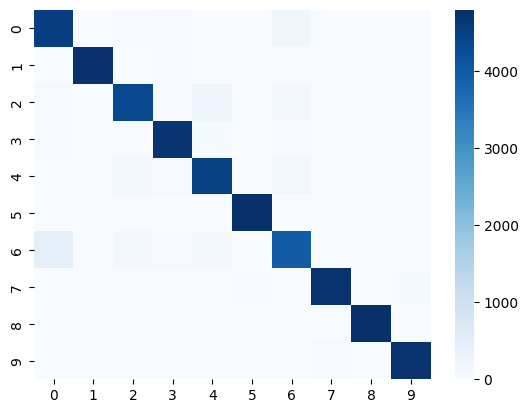

In [75]:
sns.heatmap(data=conf_mat, cmap='Blues')
plt.show()

In [76]:
val_predicts = model.predict(x=x_val)  # 검증 셋에서의 예측 확률들
val_pred_labels = val_predicts.argmax(axis=1)  # 검증 셋에서의 예측값들

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


In [77]:
val_conf_mat = confusion_matrix(y_true=y_val, y_pred=val_pred_labels)
print(val_conf_mat)

[[1087    0    8   21    3    0   76    0    5    0]
 [   0 1174    1   19    3    0    3    0    0    0]
 [  27    0 1045   16   66    0   44    0    2    0]
 [  20    6    1 1121   30    0   21    0    1    0]
 [   2    1   40   34 1058    0   65    0    0    0]
 [   0    0    0    0    0 1190    0    5    1    4]
 [ 131    2   57   21   60    0  926    0    3    0]
 [   0    0    0    0    0   28    0 1151    0   21]
 [   1    0    0    5    1    0    5    0 1188    0]
 [   0    0    0    0    0    6    0   23    0 1171]]


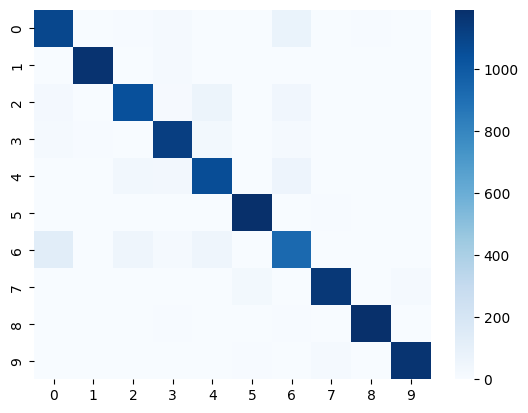

In [78]:
sns.heatmap(data=val_conf_mat, cmap='Blues')
plt.show()

# 합성곱 시각화

scikit-learn 데이터셋에서 제공되는 예제 이미지 파일들의 합성곱 연산 결과를 시각화

In [79]:
import tensorflow as tf
from sklearn.datasets import load_sample_images

In [80]:
sample_images = load_sample_images()

In [81]:
type(sample_images)  #> Bunch: Python dict와 비슷한 객체. key-value를 갖는 객체.

sklearn.utils._bunch.Bunch

In [82]:
sample_images.keys()

dict_keys(['images', 'filenames', 'DESCR'])

In [83]:
print(sample_images.DESCR)

Image: china.jpg
Released under a creative commons license. [1]
Attribution: Some rights reserved by danielbuechele [2]
Retrieved 21st August, 2011 from [3] by Robert Layton

[1] https://creativecommons.org/licenses/by/2.0/
[2] https://www.flickr.com/photos/danielbuechele/
[3] https://www.flickr.com/photos/danielbuechele/6061409035/sizes/z/in/photostream/


Image: flower.jpg
Released under a creative commons license. [1]
Attribution: Some rights reserved by danielbuechele [2]
Retrieved 21st August, 2011 from [3] by Robert Layton

[1] https://creativecommons.org/licenses/by/2.0/
[2] https://www.flickr.com/photos/vultilion/
[3] https://www.flickr.com/photos/vultilion/6056698931/sizes/z/in/photostream/






In [84]:
images = sample_images.images
#> (427, 640, 3) shape의 np.ndarray 2개를 원소로 갖는 리스트(list)

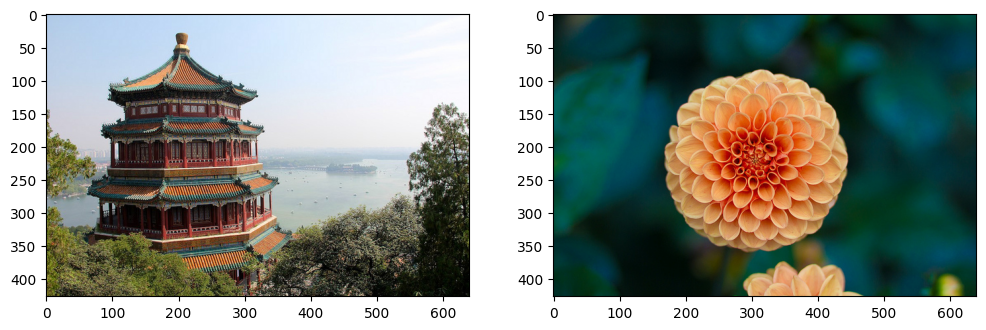

In [85]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
for i in range(2):
    ax[i].imshow(images[i])
plt.show()

In [86]:
# 이미지 자르기 - 이미지의 가운데에서 70x120 크기로 자르기.
images_crop = keras.layers.CenterCrop(height=70, width=120)(images)
images_crop.shape

TensorShape([2, 70, 120, 3])

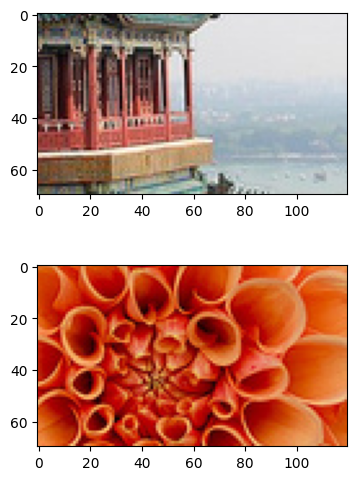

In [87]:
fig, ax = plt.subplots(nrows=2, figsize=(4, 6))
for i in range(2):
    ax[i].imshow(tf.cast(images_crop[i], dtype=tf.uint8))
plt.show()

In [88]:
# 이미지 스케일링 - 모든 픽셀의 값을 0. ~ 1. 사이의 범위로 스케일링.
images_scaled = keras.layers.Rescaling(scale=1./255)(images_crop)
images_scaled.shape

TensorShape([2, 70, 120, 3])

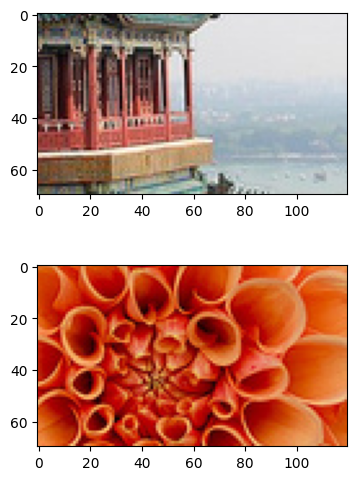

In [89]:
fig, ax = plt.subplots(nrows=2, figsize=(4, 6))
for i in range(2):
    ax[i].imshow(images_scaled[i])
plt.show()

In [90]:
# (7, 7, 3) 모양의 필터 2개를 갖는 배열
filters = np.zeros(shape=(7, 7, 3, 2))
filters[:, 3, :, 0] = 1  # 수직 방향의 값들만 합성곱이 되도록 만든 필터.
filters[3, :, :, 1] = 1  # 수평 방향의 값들만 합성곱이 되도록 만든 필터.

In [91]:
# 2-D 합성곱 연산 수행
feature_maps = tf.nn.conv2d(input=images_scaled, filters=filters,
                            strides=1, padding='SAME')
feature_maps.shape

TensorShape([2, 70, 120, 2])

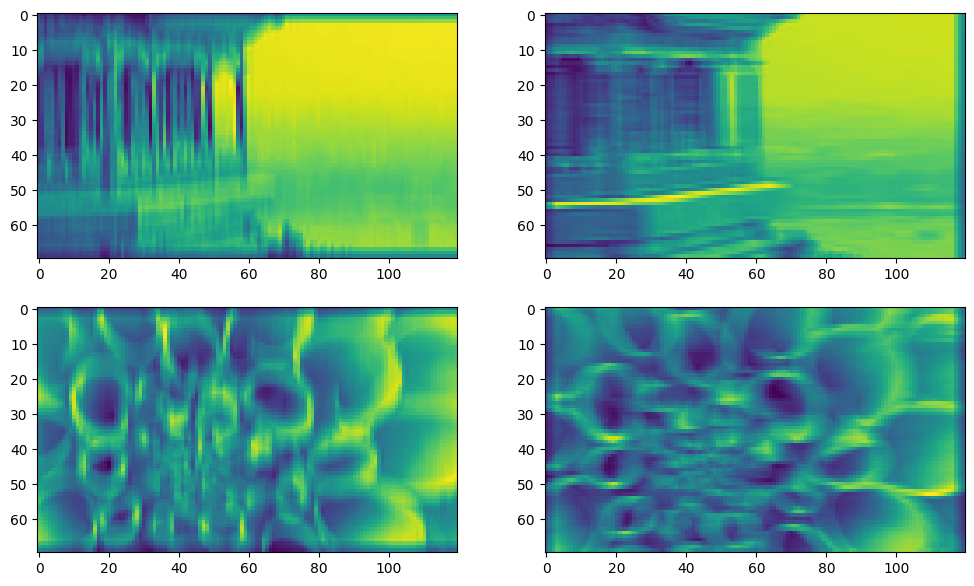

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

for i in range(2):
    for j in range(2):
        ax[i, j].imshow(feature_maps[i, :, :, j])
plt.show()

# 파이썬 클래스 `__call__` magic 메서드. 함수형 API.

클래스의 인스턴스를 함수처럼 사용할 수 있도록 만들어 주는 메서드. 클래스의 객체가 함수와 유사한 동작을 할 수 있도록 기능을 제공.

In [93]:
class Test:
    def __init__(self, value=0):
        self.value = value  # 객체의 프로퍼티를 초기화.

    def __str__(self):
        return f'Test 객체(value={self.value})'

    def __repr__(self):
        return f'Test [ value={self.value} ]'

    # 인스턴스를 함수처럼 호출했을 때 자동으로 호출되는 마법 메서드.
    def __call__(self, value):
        self.value += value
        return self  # 생성된 객체(인스턴스)를 리턴.

    def add(self, x):
        self.value += x
        return self.value

In [94]:
# 클래스 Test 타입의 객체를 생성
t = Test()  # 생성자 호출 -> __init__ 호출됨.

In [95]:
print(t)  # __str__ 메서드가 리턴하는 문자열로 출력.

Test 객체(value=0)


In [96]:
t  # __repr__ 메서드가 리턴하는 문자열로 출력.

Test [ value=0 ]

In [97]:
# 일반적인 메서드는 생성된 객체에서 참조 연산자(.)를 사용해서 호출
t.add(1)

1

In [98]:
t(10)  # 인스턴스를 마치 함수처럼 호출할 수 있음.

Test [ value=11 ]

In [99]:
t2 = Test(value=100)(10)

In [100]:
t2

Test [ value=110 ]

In [101]:
Test()(1)(2)(3)

Test [ value=6 ]

# 훈련된 합성곱 신경망 시각화

## 학습된 가중치들 시각화

In [102]:
model.layers  # Sequential 객체에 포함된 계층(layer)들

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [103]:
conv1 = model.layers[0]

In [104]:
conv1

<Conv2D name=conv2d, built=True>

In [105]:
# 첫번째 합성곱 층에서 학습된 가중치(모델 파라미터)들
# 가중치 shape: (height, width, channel, n_filters)
conv1.weights[0].shape

TensorShape([3, 3, 1, 32])

In [106]:
# 첫번째 합성곱 층에서 학습된 편향(bias)들
# 편향 shape: (n_filters,)
conv1.weights[1].shape

TensorShape([32])

In [107]:
conv1_weights = conv1.weights[0].numpy()  # tf.Tensor --> np.ndarray 변환

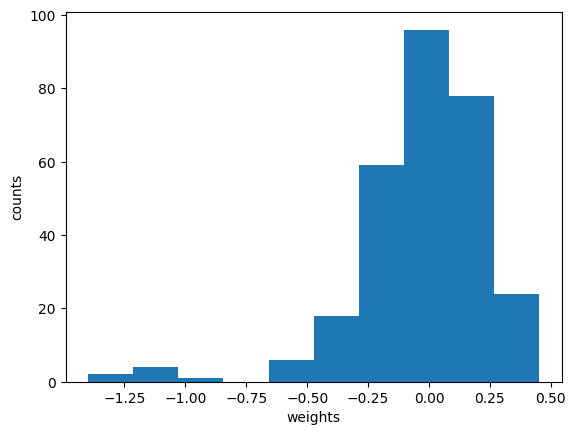

In [108]:
plt.hist(conv1_weights.reshape((-1,))) # 4차원 배열 --> 1차원 배열로 변환.
plt.xlabel('weights')
plt.ylabel('counts')
plt.show()

훈련된 층의 가중치들은 0을 중심으로 하는 정규분포와 비슷.

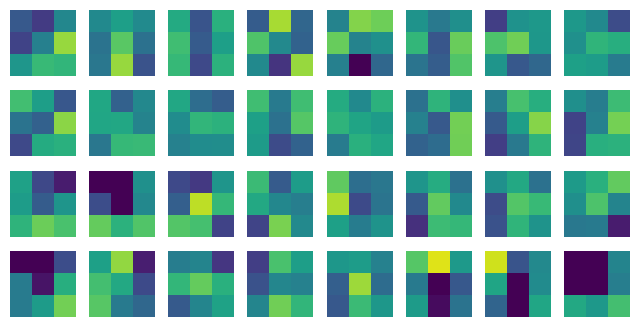

In [109]:
# 학습된 필터 가중치들을 시각화
fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(8, 4))
for i in range(4):
    for j in range(8):
        idx = i * 8 + j
        ax[i, j].imshow(conv1_weights[:, :, 0, idx], vmin=-0.5, vmax=0.5)
        # vmin, vmax: plt 모듈에서 컬러맵이 표현하는 숫자 범위.
        ax[i, j].axis('off')
plt.show()

## 학습되지 않은 가중치들을 시각화

In [110]:
not_trained_model = keras.Sequential()
not_trained_model.add(keras.Input(shape=(28, 28, 1)))
not_trained_model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                                          padding='same', activation='relu'))

In [111]:
not_trained_model.layers

[<Conv2D name=conv2d_2, built=True>]

In [112]:
not_trained_weights = not_trained_model.layers[0].weights[0].numpy()

In [113]:
not_trained_weights.shape

(3, 3, 1, 32)

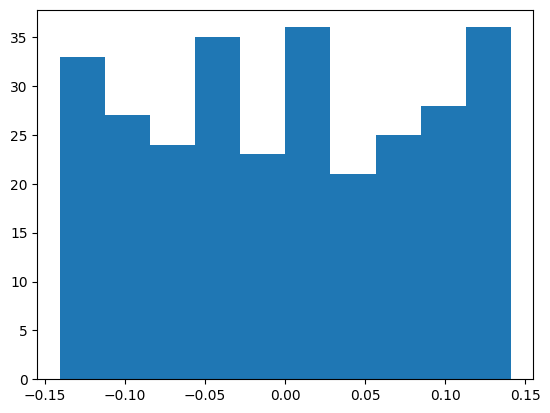

In [114]:
plt.hist(not_trained_weights.reshape((-1,)))
plt.show()

훈련되지 않은 층의 가중치들은 균등분포에 가까움.

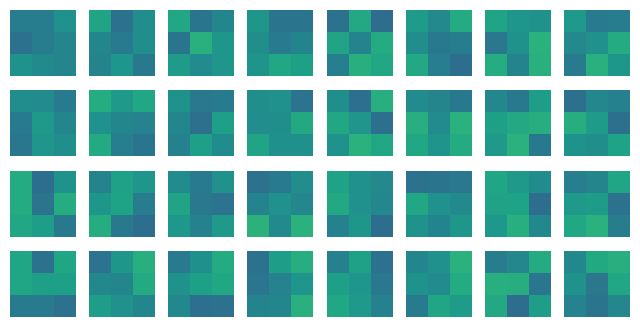

In [115]:
fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(8, 4))
for i in range(4):
    for j in range(8):
        idx = i * 8 + j
        ax[i, j].imshow(not_trained_weights[:, :, 0, idx], vmin=-0.5, vmax=0.5)
        ax[i, j].axis('off')
plt.show()

## 합성곱 층을 통과한 이미지 시각화

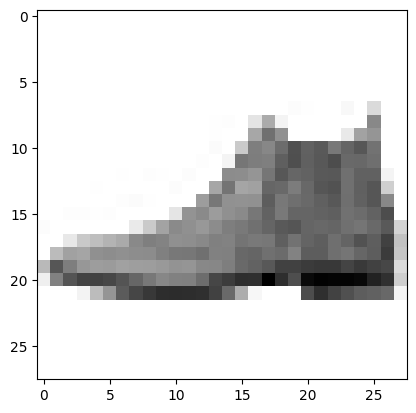

In [116]:
# 테스트 셋의 첫번째 아이템
plt.imshow(x_test_scaled[0], cmap=plt.cm.binary)
plt.show()

In [117]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor>]

In [118]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [119]:
model.layers[0].output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>

In [120]:
conv1_outputs = keras.Model(model.inputs, model.layers[0].output)

In [121]:
conv1_outputs  # Functional API

<Functional name=functional_9, built=True>

In [122]:
x_test_scaled[0].shape

(28, 28, 1)

In [123]:
x_test_scaled[:1].shape

(1, 28, 28, 1)

In [124]:
feature_maps = conv1_outputs.predict(x_test_scaled[:1])
# 주의: predict 메서드를 호출할 때는 (n_samples, height, width, n_channels) 모양의 텐서를 전달.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [125]:
feature_maps.shape

(1, 28, 28, 32)

In [126]:
def plot_feature_maps(fmaps, nrows, ncols):
    fig, ax = plt.subplots(nrows, ncols, figsize=(8, 4))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            ax[i, j].imshow(fmaps[0, :, :, idx], cmap=plt.cm.binary)
            ax[i, j].axis('off')
    plt.show()

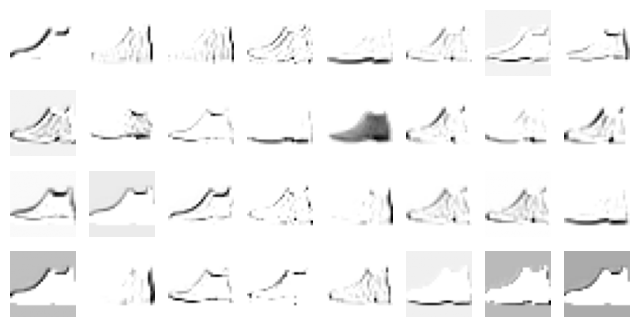

In [127]:
plot_feature_maps(fmaps=feature_maps, nrows=4, ncols=8)

## 두번째 합성곱 층을 통과한 이미지 시각화

In [128]:
conv2_outputs = keras.Model(model.inputs, model.layers[2].output)

In [129]:
feature_maps_2 = conv2_outputs.predict(x_test_scaled[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [130]:
feature_maps_2.shape

(1, 14, 14, 64)

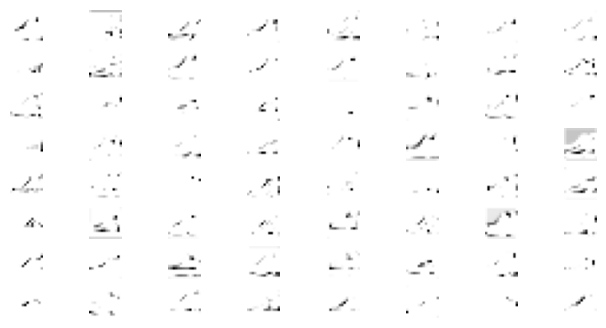

In [131]:
plot_feature_maps(fmaps=feature_maps_2, nrows=8, ncols=8)